# **ITTS | Preprocessing & EDA**

## **Data Cleaning & Preprocessing**

### Import libraries

In [1]:
import pandas as pd
import string
import re
import ast
import numpy as np
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv('../../dataset/labeled_data/ITTS_labelled.csv')

print(df.shape)
print(df.info())
df.head()


(308, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   page            308 non-null    int64  
 1   name            308 non-null    object 
 2   link            308 non-null    object 
 3   thumbnail       308 non-null    object 
 4   rating          308 non-null    float64
 5   date            308 non-null    object 
 6   snippet         129 non-null    object 
 7   images          27 non-null     object 
 8   local_guide     229 non-null    object 
 9   label_sentimen  129 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 24.2+ KB
None


,page,name,link,thumbnail,rating,date,snippet,images,local_guide,label_sentimen
0,1,Mustofa Haikal,https://www.google.com/maps/contrib/1168537167...,https://lh3.googleusercontent.com/a-/ALV-UjWwZ...,5.0,4 bulan lalu,Univ Telkom Surabaya adalah perguruan tinggi y...,['https://lh3.googleusercontent.com/geougc-cs/...,True,positif
1,1,Adi Prasetyo,https://www.google.com/maps/contrib/1034726887...,https://lh3.googleusercontent.com/a-/ALV-UjVWg...,5.0,setahun lalu,Salah satu kampus it telkom di daerah strategi...,['https://lh3.googleusercontent.com/geougc-cs/...,True,positif
2,1,Jak Ge,https://www.google.com/maps/contrib/1153534656...,https://lh3.googleusercontent.com/a/ACg8ocKp62...,5.0,3 minggu lalu,kampusnya bagus layanannya cepat dan mempermud...,NaN,True,positif
3,1,A.R. Bagas Danang Haditio,https://www.google.com/maps/contrib/1108099954...,https://lh3.googleusercontent.com/a-/ALV-UjWP9...,1.0,setahun lalu,Kangen suasana shalt ied di lapangan Telkom td...,['https://lh3.googleusercontent.com/geougc-cs/...,True,netral
4,1,Rosyid Abdillah,https://www.google.com/maps/contrib/1163780667...,https://lh3.googleusercontent.com/a-/ALV-UjX0j...,5.0,2 tahun lalu,salah satu opsi terbaik untuk studi lanjut dib...,['https://lh3.googleusercontent.com/geougc-cs/...,True,positif


In [3]:
df['rating'].describe()

count    308.000000
mean       4.824675
std        0.621369
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

### Hapus kolom yang tidak diperlukan

In [4]:
df.columns

Index(['page', 'name', 'link', 'thumbnail', 'rating', 'date', 'snippet',
       'images', 'local_guide', 'label_sentimen'],
      dtype='object')

In [5]:
# drop the columns
df = df.drop(columns=['page', 'name', 'link', 'thumbnail', 'date', 'images', 'local_guide'], axis=1)
df.head(10)

,rating,snippet,label_sentimen
0,5.0,Univ Telkom Surabaya adalah perguruan tinggi y...,positif
1,5.0,Salah satu kampus it telkom di daerah strategi...,positif
2,5.0,kampusnya bagus layanannya cepat dan mempermud...,positif
3,1.0,Kangen suasana shalt ied di lapangan Telkom td...,netral
4,5.0,salah satu opsi terbaik untuk studi lanjut dib...,positif
5,5.0,Penggemar bakso hayo coba rasa bakso saya di K...,positif
6,5.0,Pelayanan nya sangat bagus\nMembantu sekali sa...,positif
7,5.0,Satpamnya ramah dan membantu sekali untuk meng...,positif
8,5.0,Baik cukup berkesan,positif
9,5.0,"mantap pelayanannya, malah pengen masuk sini",positif


### Convert to lowercase

In [6]:
df['snippet'] = df['snippet'].str.lower()
df.head()

,rating,snippet,label_sentimen
0,5.0,univ telkom surabaya adalah perguruan tinggi y...,positif
1,5.0,salah satu kampus it telkom di daerah strategi...,positif
2,5.0,kampusnya bagus layanannya cepat dan mempermud...,positif
3,1.0,kangen suasana shalt ied di lapangan telkom td...,netral
4,5.0,salah satu opsi terbaik untuk studi lanjut dib...,positif


### Hapus Missing Values

In [7]:
df.shape

(308, 3)

In [8]:
df.isnull().sum()

rating              0
snippet           179
label_sentimen    179
dtype: int64

In [9]:
df = df.dropna()
df.head()

,rating,snippet,label_sentimen
0,5.0,univ telkom surabaya adalah perguruan tinggi y...,positif
1,5.0,salah satu kampus it telkom di daerah strategi...,positif
2,5.0,kampusnya bagus layanannya cepat dan mempermud...,positif
3,1.0,kangen suasana shalt ied di lapangan telkom td...,netral
4,5.0,salah satu opsi terbaik untuk studi lanjut dib...,positif


In [10]:
df.isnull().sum()

rating            0
snippet           0
label_sentimen    0
dtype: int64

In [11]:
df.shape

(129, 3)

### Menghapus Whitespace

In [12]:
def remove_extra_whitespace(text):
    # Menghapus spasi di awal dan akhir teks
    text = text.strip()
    # Menghapus spasi berlebih di tengah teks
    text = re.sub('\s+', ' ', text)
    return text

df['snippet'] = df['snippet'].apply(remove_extra_whitespace)

In [13]:
df.head()

,rating,snippet,label_sentimen
0,5.0,univ telkom surabaya adalah perguruan tinggi y...,positif
1,5.0,salah satu kampus it telkom di daerah strategi...,positif
2,5.0,kampusnya bagus layanannya cepat dan mempermud...,positif
3,1.0,kangen suasana shalt ied di lapangan telkom td...,netral
4,5.0,salah satu opsi terbaik untuk studi lanjut dib...,positif


### Hapus Punctuation

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

df['snippet'] = df['snippet'].apply(remove_punctuations)

In [16]:
df.head()

,rating,snippet,label_sentimen
0,5.0,univ telkom surabaya adalah perguruan tinggi y...,positif
1,5.0,salah satu kampus it telkom di daerah strategi...,positif
2,5.0,kampusnya bagus layanannya cepat dan mempermud...,positif
3,1.0,kangen suasana shalt ied di lapangan telkom td...,netral
4,5.0,salah satu opsi terbaik untuk studi lanjut dib...,positif


### Visualisasi sebelum preprocessing

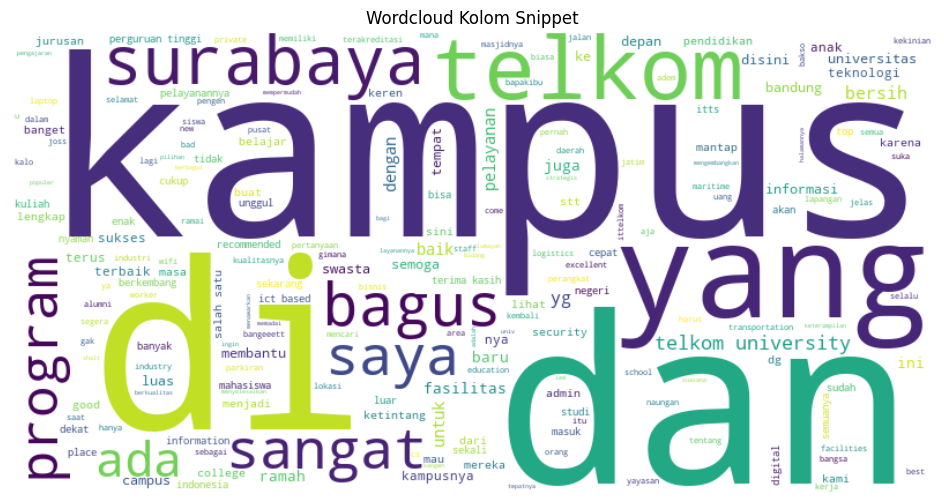

In [17]:
# Gabungkan semua teks dari kolom 'snippet' yang tidak null
text = " ".join(df['snippet'].dropna())

# Buat dan tampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kolom Snippet')
plt.show()

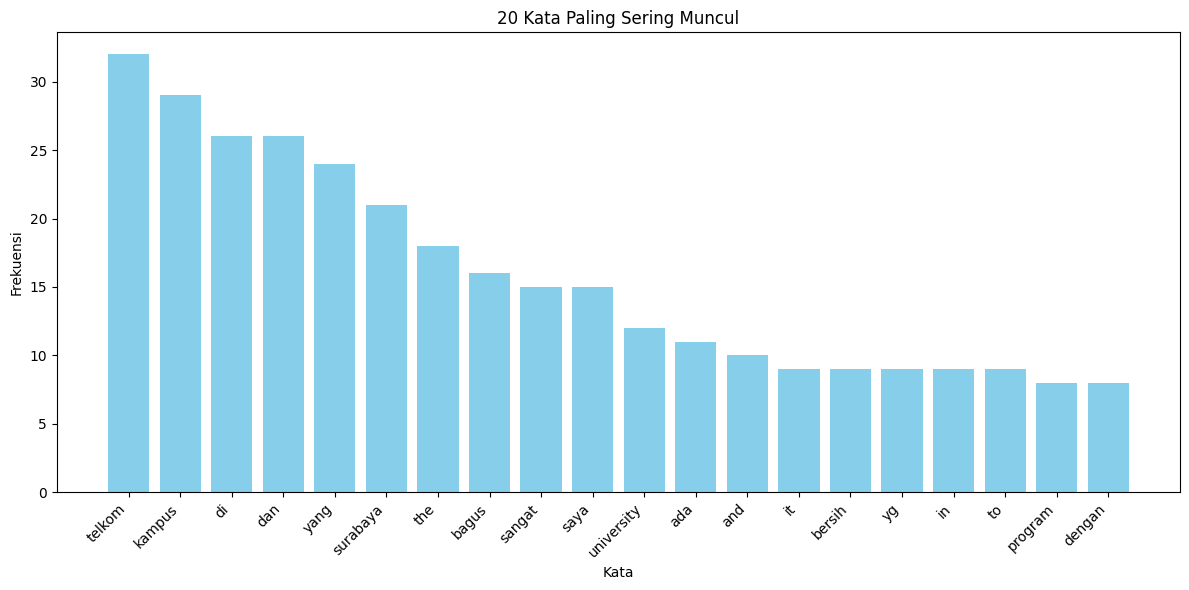

In [18]:
from collections import Counter

# Tokenisasi dan hitung frekuensi kata
words = text.split()
word_freq = Counter(words)

# Ambil 20 kata paling sering muncul
most_common = word_freq.most_common(20)
words_plot, counts_plot = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Normalisasi

In [19]:
# Load kamus slang
with open('kamus_slang.json', encoding='utf-8') as f:
    slang_dict = ast.literal_eval(f.read())

# Fungsi untuk mengganti kata slang dengan kata yang sudah dinormalisasi
def normalize_text(text):
    words = text.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    return " ".join(normalized_words)

# Menerapkan normalisasi pada kolom snippet
df['snippet'] = df['snippet'].apply(lambda x: normalize_text(x))
df.head(10)
    

,rating,snippet,label_sentimen
0,5.0,universitas telekomunikasi surabaya adalah per...,positif
1,5.0,salah satu kampus itu telekomunikasi di daerah...,positif
2,5.0,kampusnya bagus layanannya cepat dan mempermud...,positif
3,1.0,kangen suasana shalt ied di lapangan telekomun...,netral
4,5.0,salah satu opsi terbaik untuk studi lanjut dib...,positif
5,5.0,penggemar bakso hayo coba rasa bakso saya di k...,positif
6,5.0,pelayanan nya sangat bagus membantu sekali saa...,positif
7,5.0,satpamnya ramah dan membantu sekali untuk meng...,positif
8,5.0,baik cukup berkesan,positif
9,5.0,mantap pelayanannya bahkan pengin masuk sini,positif


### Tokenisasi

In [20]:
def tokenize_text(text):
    # Tokenisasi teks
    tokens = text.split()
    # Mengembalikan daftar token
    return tokens

df['tokens'] = df['snippet'].apply(tokenize_text)

df.head(10)

,rating,snippet,label_sentimen,tokens
0,5.0,universitas telekomunikasi surabaya adalah per...,positif,"[universitas, telekomunikasi, surabaya, adalah..."
1,5.0,salah satu kampus itu telekomunikasi di daerah...,positif,"[salah, satu, kampus, itu, telekomunikasi, di,..."
2,5.0,kampusnya bagus layanannya cepat dan mempermud...,positif,"[kampusnya, bagus, layanannya, cepat, dan, mem..."
3,1.0,kangen suasana shalt ied di lapangan telekomun...,netral,"[kangen, suasana, shalt, ied, di, lapangan, te..."
4,5.0,salah satu opsi terbaik untuk studi lanjut dib...,positif,"[salah, satu, opsi, terbaik, untuk, studi, lan..."
5,5.0,penggemar bakso hayo coba rasa bakso saya di k...,positif,"[penggemar, bakso, hayo, coba, rasa, bakso, sa..."
6,5.0,pelayanan nya sangat bagus membantu sekali saa...,positif,"[pelayanan, nya, sangat, bagus, membantu, seka..."
7,5.0,satpamnya ramah dan membantu sekali untuk meng...,positif,"[satpamnya, ramah, dan, membantu, sekali, untu..."
8,5.0,baik cukup berkesan,positif,"[baik, cukup, berkesan]"
9,5.0,mantap pelayanannya bahkan pengin masuk sini,positif,"[mantap, pelayanannya, bahkan, pengin, masuk, ..."


### Visualisasi setelah preprocessing

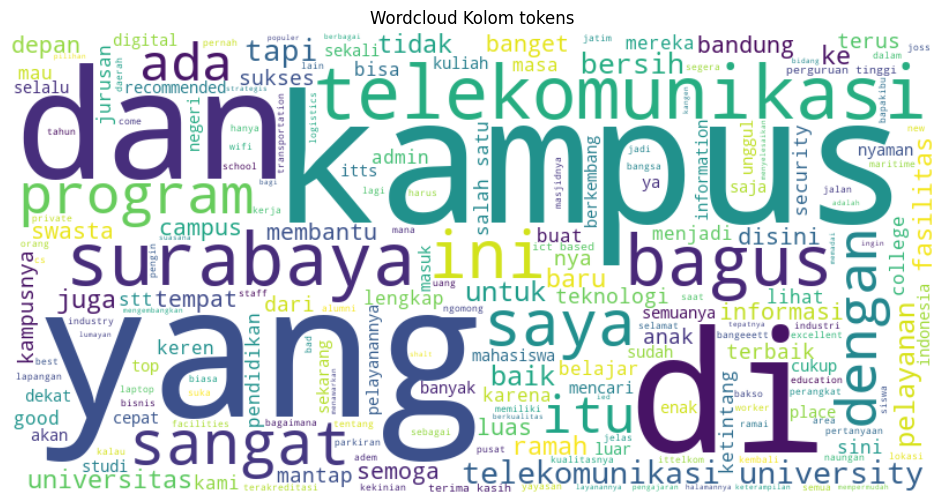

In [21]:
# Gabungkan semua token dari kolom 'tokens' yang tidak null menjadi satu string
all_tokens = [token for tokens in df['tokens'].dropna() for token in tokens]
text = " ".join(all_tokens)

# Buat dan tampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kolom tokens')
plt.show()

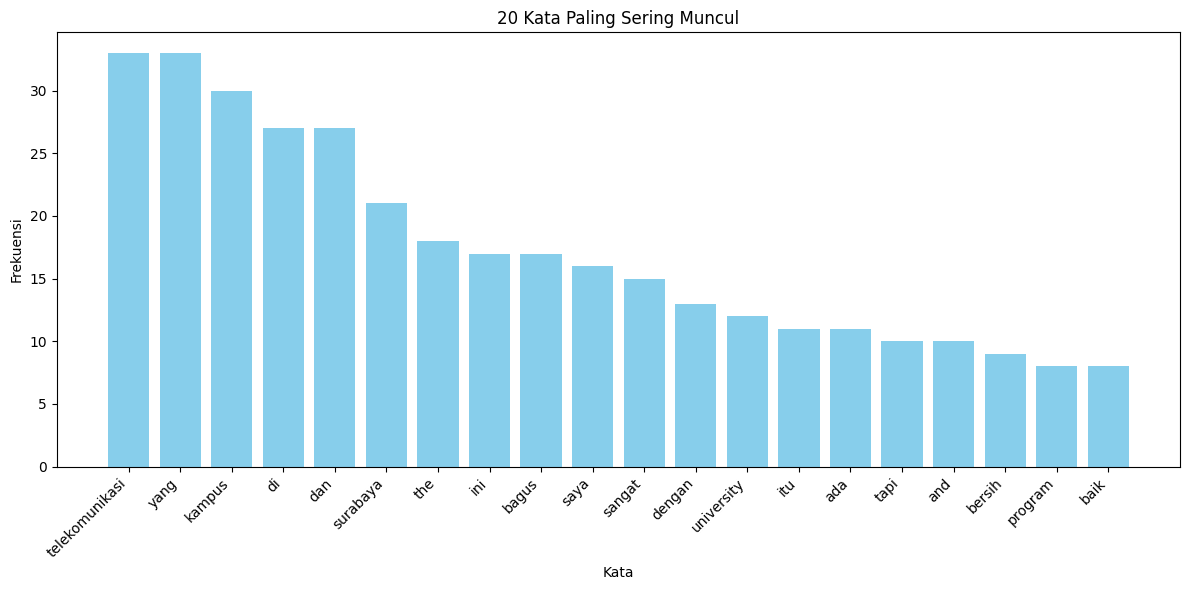

In [22]:
from collections import Counter

# Tokenisasi dan hitung frekuensi kata
words = text.split()
word_freq = Counter(words)

# Ambil 20 kata paling sering muncul
most_common = word_freq.most_common(20)
words_plot, counts_plot = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Simpan dataset bersih


In [23]:
# Ubah urutan kolom sebelum menyimpan
df = df[['rating', 'snippet', 'tokens', 'label_sentimen']]

output_path = '../../dataset/cleaned_dataset/ITTS_labelled_cleaned.csv'

try:
	# Save the dataframe to a CSV file
	df.to_csv(output_path, index=False)
	print(f"DataFrame successfully saved to {output_path}")
except Exception as e:
	print(f"An error occurred: {e}")

DataFrame successfully saved to ../../dataset/cleaned_dataset/ITTS_labelled_cleaned.csv


## **Exploratory Data Analysis (EDA)**

In [24]:
df['rating'].unique()

array([5., 1., 4.])

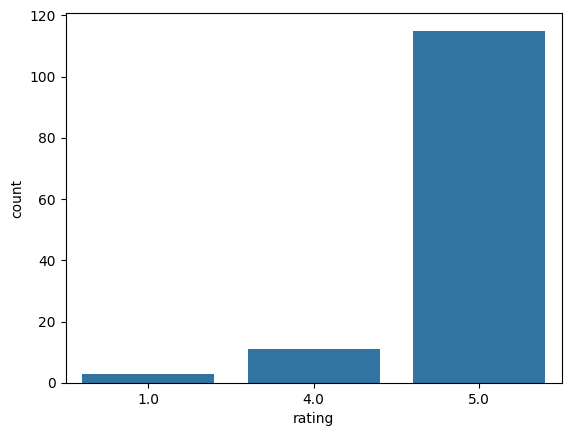

rating
5.0    115
4.0     11
1.0      3
Name: count, dtype: int64


In [25]:
sns.countplot(x=df['rating'])
plt.show()
print(df['rating'].value_counts())

In [26]:
df['label_sentimen'].unique()

array(['positif', 'netral', 'negatif'], dtype=object)

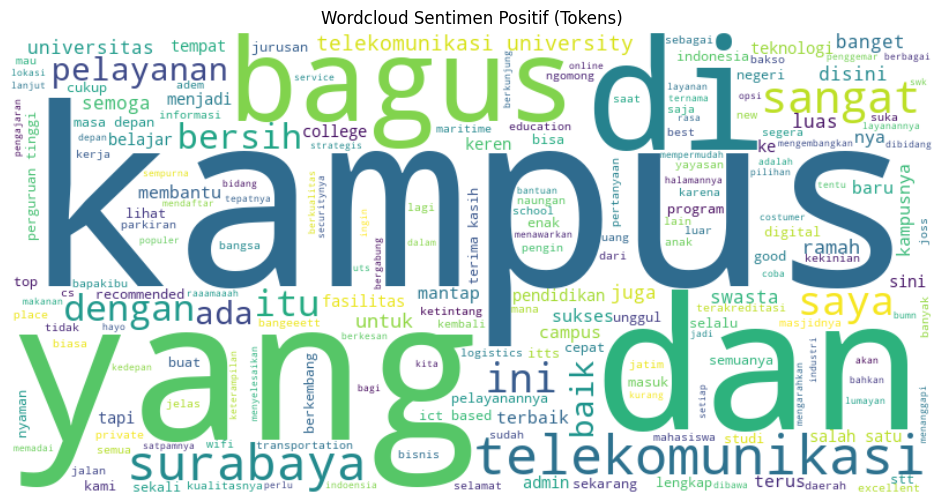

In [27]:
# Visualisasi Wordcloud untuk sentimen positif pada kolom tokens
tokens_positif = df[df['label_sentimen'] == 'positif']['tokens'].dropna()
text_tokens_positif = " ".join([token for tokens in tokens_positif for token in tokens])
wordcloud_tokens_positif = WordCloud(width=800, height=400, background_color='white').generate(text_tokens_positif)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tokens_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif (Tokens)')
plt.show()

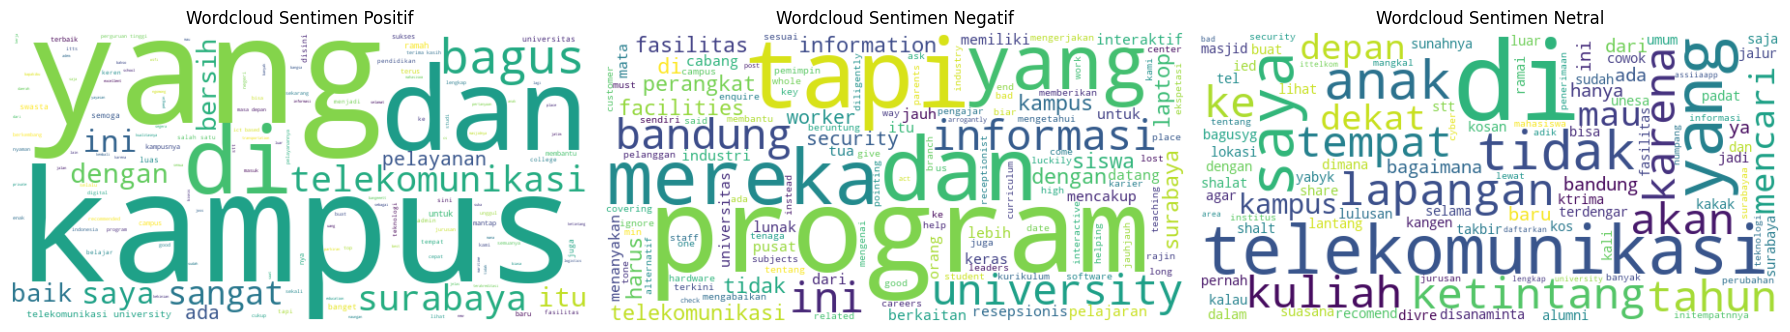

In [28]:
# Visualisasi Wordcloud untuk masing-masing sentimen pada kolom tokens
sentiments = ['positif', 'negatif', 'netral']
plt.figure(figsize=(18, 5))

for i, sentiment in enumerate(sentiments):
    # Gabungkan semua token menjadi satu string untuk sentimen tertentu
    tokens_sentiment = df[df['label_sentimen'] == sentiment]['tokens'].dropna()
    text_sentiment = " ".join([token for tokens in tokens_sentiment for token in tokens])
    wordcloud = WordCloud(width=600, height=300, background_color='white').generate(text_sentiment)
    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud Sentimen {sentiment.capitalize()}')

plt.tight_layout()
plt.show()

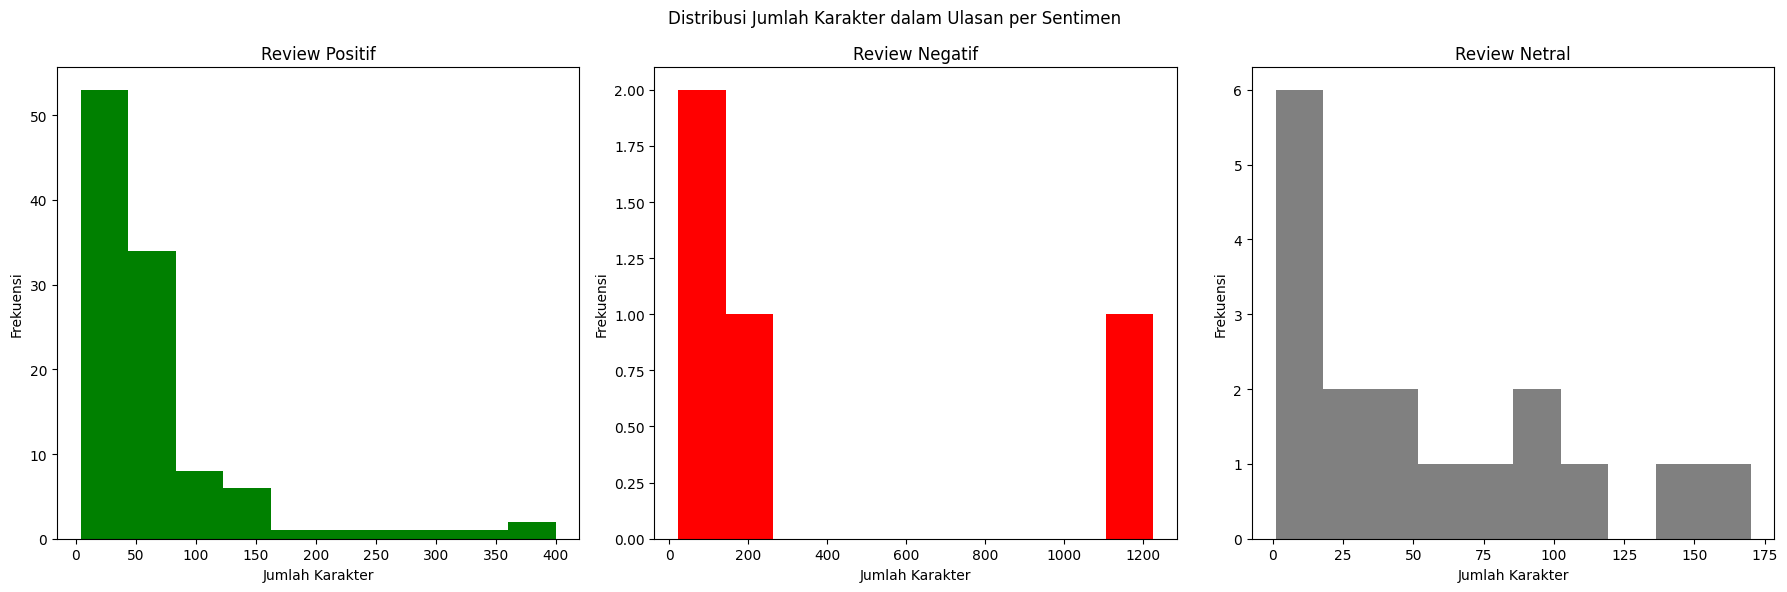

In [29]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ['positif', 'negatif', 'netral']
colors = ['green', 'red', 'gray']

for i, sentiment in enumerate(sentiments):
    review_lengths = df[df['label_sentimen'] == sentiment]['snippet'].str.len()
    axes[i].hist(review_lengths, color=colors[i])
    axes[i].set_title(f'Review {sentiment.capitalize()}')
    axes[i].set_xlabel('Jumlah Karakter')
    axes[i].set_ylabel('Frekuensi')

figure.suptitle('Distribusi Jumlah Karakter dalam Ulasan per Sentimen')
plt.tight_layout()
plt.show()


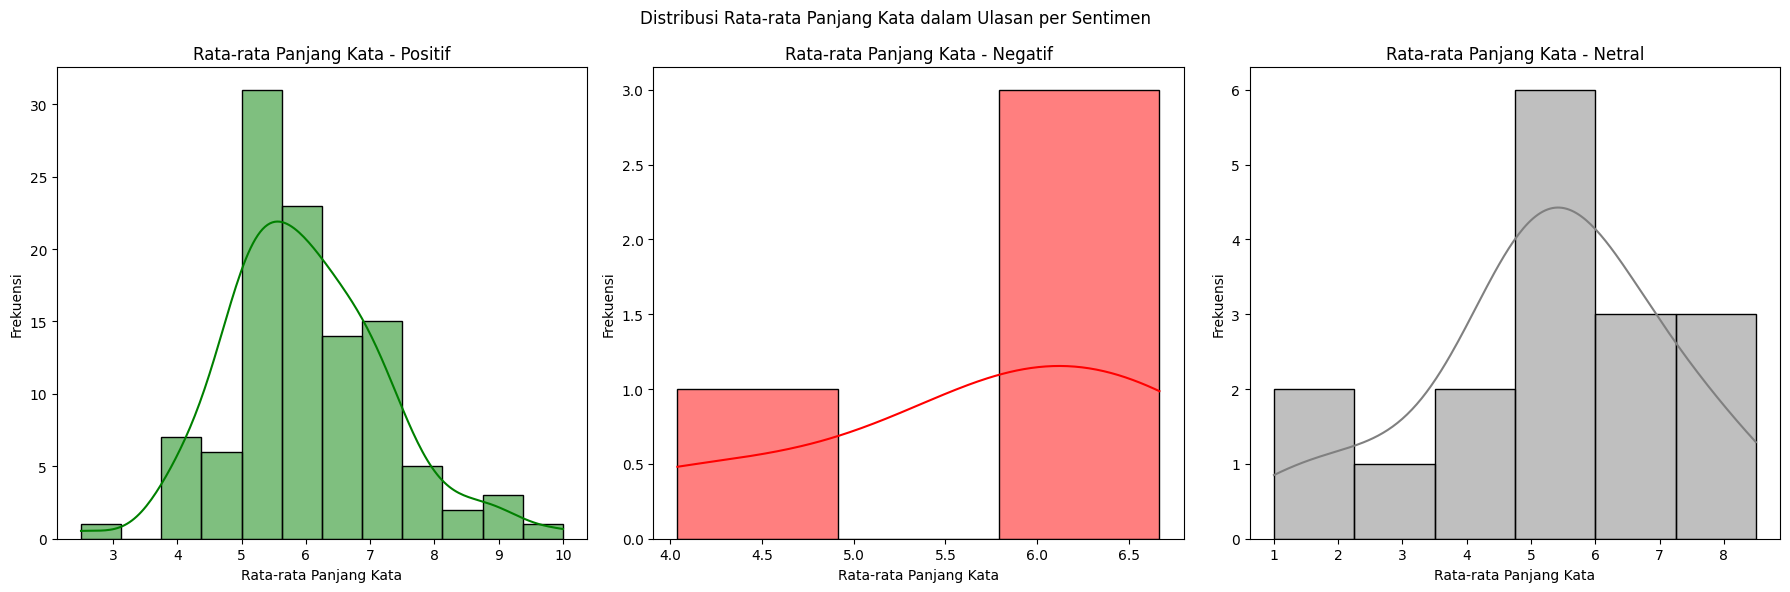

In [30]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ['positif', 'negatif', 'netral']
colors = ['green', 'red', 'gray']

for i, sentiment in enumerate(sentiments):
    # Ambil token untuk setiap sentimen
    tokens = df[df['label_sentimen'] == sentiment]['tokens']
    # Hitung rata-rata panjang kata per ulasan
    avg_word_length = tokens.apply(lambda x: np.mean([len(word) for word in x]) if x else 0)
    sns.histplot(avg_word_length, ax=axes[i], color=colors[i], kde=True)
    axes[i].set_title(f'Rata-rata Panjang Kata - {sentiment.capitalize()}')
    axes[i].set_xlabel('Rata-rata Panjang Kata')
    axes[i].set_ylabel('Frekuensi')

figure.suptitle('Distribusi Rata-rata Panjang Kata dalam Ulasan per Sentimen')
plt.tight_layout()
plt.show()


In [31]:
from collections import Counter
import plotly.express as px

def get_top_token_ngrams(token_series, n=20, ngram=1):
    ngram_list = []
    for tokens in token_series.dropna():
        ngram_list.extend([' '.join(tokens[i:i+ngram]) for i in range(len(tokens)-ngram+1)])
    return Counter(ngram_list).most_common(n)

# Visualisasi untuk sentimen positif
tokens_positif = df[df['label_sentimen'] == 'positif']['tokens']
most_common_uni_positif = get_top_token_ngrams(tokens_positif, 20, 1)
most_common_uni_positif = dict(most_common_uni_positif)

temp_positif = pd.DataFrame({
    "Common_words": list(most_common_uni_positif.keys()),
    "Count": list(most_common_uni_positif.values())
})

fig_positif = px.bar(
    temp_positif, x="Count", y="Common_words",
    title="Common Words in Positif Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_positif.show()

# Visualisasi untuk sentimen negatif
tokens_negatif = df[df['label_sentimen'] == 'negatif']['tokens']
most_common_uni_negatif = get_top_token_ngrams(tokens_negatif, 20, 1)
most_common_uni_negatif = dict(most_common_uni_negatif)

temp_negatif = pd.DataFrame({
    "Common_words": list(most_common_uni_negatif.keys()),
    "Count": list(most_common_uni_negatif.values())
})

fig_negatif = px.bar(
    temp_negatif, x="Count", y="Common_words",
    title="Common Words in Negatif Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_negatif.show()

# Visualisasi untuk sentimen netral
tokens_netral = df[df['label_sentimen'] == 'netral']['tokens']
most_common_uni_netral = get_top_token_ngrams(tokens_netral, 20, 1)
most_common_uni_netral = dict(most_common_uni_netral)

temp_netral = pd.DataFrame({
    "Common_words": list(most_common_uni_netral.keys()),
    "Count": list(most_common_uni_netral.values())
})

fig_netral = px.bar(
    temp_netral, x="Count", y="Common_words",
    title="Common Words in Netral Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_netral.show()


# **⚠️ Warning:**  
Disitribusi kelas tidak seimbang (imbalance data) pada kelas positif, negatif, dan netral sehingga perlu dilakukan balancing data. (bisa pake teknik oversampling, undersampling, atau SMOTE)

In [32]:
df['label_sentimen'].value_counts()

label_sentimen
positif    108
netral      17
negatif      4
Name: count, dtype: int64

### Handling Imbalance Data (Oversampling dengan SMOTE)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from collections import Counter

In [34]:
# Gabungkan token menjadi string kalimat
df['text'] = df['tokens'].apply(lambda x: " ".join(x))

In [35]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

# Label
y = df['label_sentimen']

# Sebelum SMOTE
print("Distribusi label sebelum SMOTE:", Counter(y))

Distribusi label sebelum SMOTE: Counter({'positif': 108, 'netral': 17, 'negatif': 4})


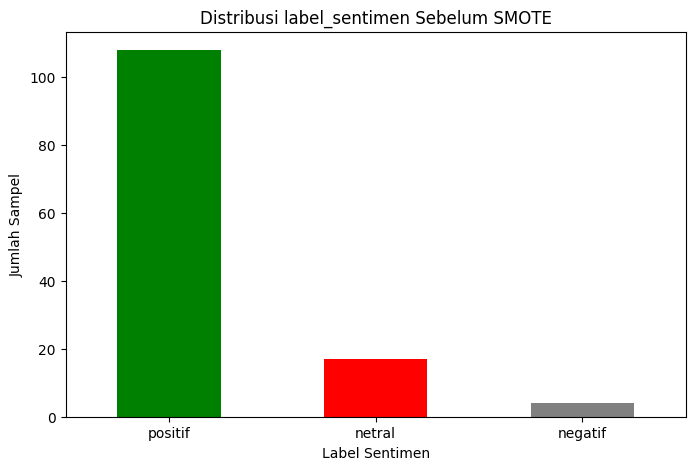

label_sentimen
positif    108
netral      17
negatif      4
Name: count, dtype: int64

In [36]:
# Visualisasi distribusi label_sentimen sebelum SMOTE
plt.figure(figsize=(8, 5))
y.value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribusi label_sentimen Sebelum SMOTE')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

y.value_counts()

In [37]:
# Terapkan SMOTE dengan k_neighbors=3 karena kelas minoritas hanya punya 4 sampel
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Setelah SMOTE
print("Distribusi label setelah SMOTE:", Counter(y_resampled))

Distribusi label setelah SMOTE: Counter({'positif': 108, 'netral': 108, 'negatif': 108})


In [38]:
# Simpan hasilnya dalam DataFrame
X_res_df = pd.DataFrame(X_resampled.toarray(), columns=vectorizer.get_feature_names_out())
y_res_df = pd.DataFrame(y_resampled, columns=["label_sentimen"])

# Gabungkan hasil
df = pd.concat([X_res_df, y_res_df], axis=1)

df.head()

,10,13,2024,about,academic,access,act,ada,adalah,adem,...,wonokromo,work,worker,world,ya,yabyk,yang,yayasan,you,label_sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189145,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.299602,0.0,0.0,positif
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,positif
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,positif
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,netral
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,positif


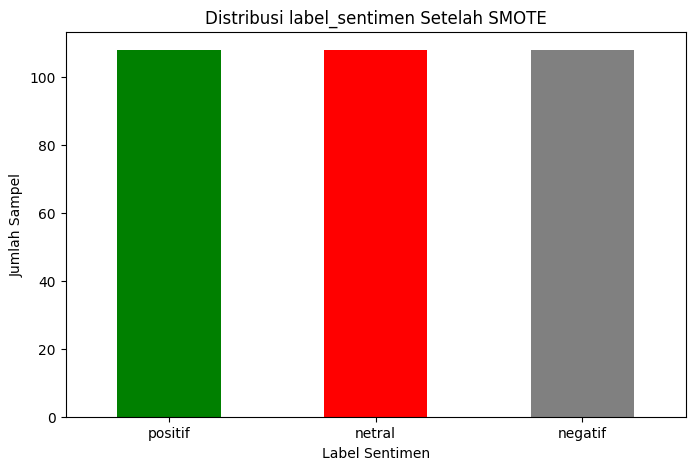

label_sentimen
positif    108
netral     108
negatif    108
Name: count, dtype: int64

In [39]:
import matplotlib.pyplot as plt

# Visualisasi distribusi label_sentimen setelah SMOTE
plt.figure(figsize=(8, 5))
y_res_df['label_sentimen'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribusi label_sentimen Setelah SMOTE')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

df['label_sentimen'].value_counts()

### Simpan Dataset Balanced

In [40]:
output_path = '../../dataset/balanced_data/ITTS_labelled_balanced.csv'

try:
	# Save the dataframe to a CSV file
	df.to_csv(output_path, index=False)
	print(f"DataFrame successfully saved to {output_path}")
except Exception as e:
	print(f"An error occurred: {e}")

DataFrame successfully saved to ../../dataset/balanced_data/ITTS_labelled_balanced.csv
